# ANALISIS DE LOS CLUSTERES --> CARACTERIZAR CLUSTERES

In [2]:
import pandas as pd
import numpy as np
import os
import Funciones_limpieza as lmp
import seaborn as sns
import matplotlib.pyplot as plt



Definimos paleta de colores

In [3]:
# Paleta
palette_hospitality = [
    "#1F3C4B", "#2C6E91", "#6B8E23", "#4F7C6B",
    "#E6D5B8", "#D8CFC4", "#C97C5D", "#C9A24D",
    "#4A4A4A", "#9E9E9E", "#F7F4EF", "#1C1C1C",
    "#8B3A3A",  # rojo apagado
    "#6F8F72"   # verde oliva suave
]

# Tema base Seaborn (afecta también a matplotlib)
sns.set_theme(
    style="whitegrid",
    palette=palette_hospitality,
    rc={
        # Tamaño de figuras
        "figure.figsize": (10, 6),

        # Títulos y labels
        "axes.titlesize": 14,
        "axes.labelsize": 12,

        # Líneas
        "lines.linewidth": 2,

        # Grid
        "grid.alpha": 0.3,

        # Tipografía
        "font.size": 11
    }
)

# Asegurar que matplotlib use exactamente la misma paleta
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=palette_hospitality)

In [4]:
ruta_csv = os.path.join("..", "Datos", "Resultados", "df_con_clusters_asignados.csv")

# Cargar el CSV en un DataFrame
df = pd.read_csv(ruta_csv,true_values=['yes'], false_values=['no'],
    decimal='.', sep=',', thousands=',')

## UTILIZANDO LA FUNCION DEL .PY DE FUNCIONES CORREGIMOS TIPO DE COLUMNAS

In [5]:
df = lmp.detectar_tipos_columnas(df)['dataframe_transformado']


c:\Users\maita\OneDrive\Escritorio\BDATA 2\RETO 6\CASOS PRACTICOS\RETO06_NARANJA\Scripts\Funciones_limpieza.py:55: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  fechas = pd.to_datetime(serie, errors="coerce", infer_datetime_format=True)
c:\Users\maita\OneDrive\Escritorio\BDATA 2\RETO 6\CASOS PRACTICOS\RETO06_NARANJA\Scripts\Funciones_limpieza.py:55: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  fechas = pd.to_datetime(serie, errors="coerce", infer_datetime_format=True)
c:\Users\maita\OneDrive\Escritorio\BDATA 2\RETO 6\CASOS PRACTICOS\RETO06_NARANJA\Scripts

In [6]:
df.value_counts('clusters')

clusters
0    20463
2    12571
1    10614
3     8802
Name: count, dtype: int64

### Agrupamos por cluster y sacamos estadisticas

### Sacamos listas por cada tipo de columna de las columnas con la funcion creada

In [7]:
columnas_numericas = lmp.detectar_tipos_columnas(df)['numericas']
columnas_numericas.remove('clusters')
columnas_fecha = lmp.detectar_tipos_columnas(df)['fechas']
columnas_booleanas = lmp.detectar_tipos_columnas(df)['booleanas']
columnas_categoricas = lmp.detectar_tipos_columnas(df)['categoricas']

c:\Users\maita\OneDrive\Escritorio\BDATA 2\RETO 6\CASOS PRACTICOS\RETO06_NARANJA\Scripts\Funciones_limpieza.py:55: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  fechas = pd.to_datetime(serie, errors="coerce", infer_datetime_format=True)
c:\Users\maita\OneDrive\Escritorio\BDATA 2\RETO 6\CASOS PRACTICOS\RETO06_NARANJA\Scripts\Funciones_limpieza.py:55: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  fechas = pd.to_datetime(serie, errors="coerce", infer_datetime_format=True)
c:\Users\maita\OneDrive\Escritorio\BDATA 2\RETO 6\CASOS PRACTICOS\RETO06_NARANJA\Scripts

### Primero vamos a sacar cada cluster que porcentaje de personas que cancelan representan respecto a todos los registros

In [8]:
personas_cancelar_cluster = df.groupby('clusters')['ha_cancelado'].sum()
personas_cancelar = df['ha_cancelado'].sum()

pct_cancelar_por_cluster = (personas_cancelar_cluster/personas_cancelar)*100
pct_cancelar_por_cluster # el cluster que mejor representa las personas que han cancelado es el cluster 0 aunque no es una gran proporción tampoco

clusters
0    41.621706
1    17.765267
2    22.347330
3    18.265697
Name: ha_cancelado, dtype: float64

Estadisticas de las columnas numericas

In [9]:
metricas_numericas = (
    df
    .groupby("clusters")[columnas_numericas]
    .mean()
    .round(2)
)
metricas_numericas

,lead_time,lenght_of_stay,adult_count,child_count,available_units,completed_entry_forms_count,recurrence,product_count,reservation_net_value,total_adr,cancellation_lead_time,ratio_asistencia,ratio_cancelaciones_mes_respecto_reservas,antiguedad_hotel_en_dias
clusters,,,,,,,,,,,,,,
0,27.93,3.13,2.42,0.32,21.97,1.80,1.25,0.86,399.94,136.36,3.61,0.70,0.24,1463.66
1,26.12,1.99,1.70,0.22,128.62,1.19,1.53,0.62,113.46,59.37,3.18,0.75,0.24,1328.81
2,26.17,3.58,2.34,0.49,120.00,1.79,2.20,1.18,291.25,106.63,4.49,0.68,0.24,1828.00
3,38.38,1.98,1.74,0.19,135.00,1.15,1.40,0.52,115.56,65.46,5.75,0.70,0.24,2123.00


Columnas categoricas

In [10]:
def moda(x):
    return x.value_counts().index[0]

metricas_categoricas = (
    df
    .groupby("clusters")[columnas_categoricas]
    .agg(moda)
)
metricas_categoricas 

,checkin_month,checkin_day,origin,travel_agency_name,requested_category,requested_category_name,asset,asset_type,business_segment,rate,rate_group_name,rate_type,status,cancellation_reason,momento_checkin,estacion_estancia,estacion_reserva,city
clusters,,,,,,,,,,,,,,,,,,
0,April,Friday,channel_manager,Booking.com,Studio,Studio in Madrid Palacio Real,Líbere Madrid Palacio Real,apartment,Leisure Individual,Flexible_RoomOnly,Flexible-2d | B2C,Flexible,checked_out,not cancelled,antes,verano,primavera,Madrid
1,October,Friday,channel_manager,Booking.com,Hostel room,10 bed community room with ensuite bathroom,Líbere Córdoba Patio Santa Marta,hostel,Leisure Individual,Flexible_RoomOnly,Flexible-2d | B2C,Flexible,checked_out,not cancelled,antes,otoño,otoño,Córdoba
2,August,Friday,channel_manager,Booking.com,One bedroom apartment,One bedroom apartment in Vitoria city centre,Líbere Vitoria,aparthotel,Leisure Individual,Flexible_RoomOnly,Flexible-2d | B2C,Flexible,checked_out,not cancelled,antes,verano,verano,Vitoria
3,August,Friday,channel_manager,Booking.com,Hostel bed,6 bed community room with shared bathroom,Koisi Hostel,hostel,Leisure Individual,Flexible_RoomOnly,Flexible-2d | B2C,Flexible,checked_out,not cancelled,antes,verano,primavera,Donostia


Cogemos solo las que hay diferencias y podemos sacar conclusiones

In [11]:
metricas_categoricas = metricas_categoricas[['checkin_month', 'checkin_day','requested_category','asset', 'asset_type','estacion_estancia',
       'estacion_reserva', 'city']]


Para saber la razon de la cancelacion, vamos a coger la moda de los que han cancelado

In [12]:
df_cancelado = df[df['ha_cancelado']]

cancelacion_reason_cluster = (
    df_cancelado
    .groupby("clusters")['cancellation_reason']
    .agg(moda)
    .reset_index()
)
metricas_categoricas = cancelacion_reason_cluster.join(metricas_categoricas, on = 'clusters')

In [13]:
df_cancelado.value_counts(['clusters','cancellation_reason']).reset_index()

,clusters,cancellation_reason,count
0,0,refuse_to_detail,3826
1,2,refuse_to_detail,1745
2,1,refuse_to_detail,1624
3,3,refuse_to_detail,1406
4,0,payment_missed,428
5,2,payment_missed,314
6,3,payment_missed,278
7,0,no_show,265
8,0,other,229
9,1,payment_missed,220


Columnas booleanas

In [14]:
columnas_booleanas.remove('ha_cancelado')

metricas_booleanas = (
    df
    .groupby("clusters")[columnas_booleanas]
    .mean()
    .round(2)
)
metricas_booleanas

,all_entry_forms_completed,returning_inhabitant,libere_community,bought_products,zona_roja,es_festivo,es_finde
clusters,,,,,,,
0,0.75,0.10,0.20,0.36,0.40,0.08,0.22
1,0.77,0.08,0.12,0.33,0.36,0.07,0.24
2,0.77,0.18,0.22,0.43,0.36,0.10,0.25
3,0.70,0.13,0.11,0.26,0.42,0.07,0.24


### JUNTAMOS EN UN DATA FRAME TODAS LAS COLUMNAS

In [15]:
primer_merge = metricas_booleanas.merge(metricas_numericas, on = 'clusters')
segundo_merge = primer_merge.merge(metricas_categoricas,on='clusters')
merge_metricas = segundo_merge.merge(pct_cancelar_por_cluster, on = 'clusters')
# display(merge_metricas)
merge_metricas = merge_metricas.rename(columns={
    'ha_cancelado_x': 'cancelaciones_en_ese_cluster',
    'ha_cancelado_y': 'pct_cancelaciones_respecto_todo_df'
})
print(merge_metricas)


   clusters  all_entry_forms_completed  returning_inhabitant  \
0         0                       0.75                  0.10   
1         1                       0.77                  0.08   
2         2                       0.77                  0.18   
3         3                       0.70                  0.13   

   libere_community  bought_products  zona_roja  es_festivo  es_finde  \
0              0.20             0.36       0.40        0.08      0.22   
1              0.12             0.33       0.36        0.07      0.24   
2              0.22             0.43       0.36        0.10      0.25   
3              0.11             0.26       0.42        0.07      0.24   

   lead_time  lenght_of_stay  ...  cancellation_reason  checkin_month  \
0      27.93            3.13  ...     refuse_to_detail          April   
1      26.12            1.99  ...     refuse_to_detail        October   
2      26.17            3.58  ...     refuse_to_detail         August   
3      38.38         

### GRAFICOS

In [16]:
merge_metricas.columns

Index(['clusters', 'all_entry_forms_completed', 'returning_inhabitant',
       'libere_community', 'bought_products', 'zona_roja', 'es_festivo',
       'es_finde', 'lead_time', 'lenght_of_stay', 'adult_count', 'child_count',
       'available_units', 'completed_entry_forms_count', 'recurrence',
       'product_count', 'reservation_net_value', 'total_adr',
       'cancellation_lead_time', 'ratio_asistencia',
       'ratio_cancelaciones_mes_respecto_reservas', 'antiguedad_hotel_en_dias',
       'cancellation_reason', 'checkin_month', 'checkin_day',
       'requested_category', 'asset', 'asset_type', 'estacion_estancia',
       'estacion_reserva', 'city', 'ha_cancelado'],
      dtype='object')

In [17]:
df.columns

Index(['booked_at', 'checkin_time', 'checkout_time', 'lead_time',
       'lenght_of_stay', 'checkin_month', 'checkin_day', 'adult_count',
       'child_count', 'origin', 'travel_agency_name', 'requested_category',
       'requested_category_name', 'asset', 'asset_type', 'asset_opening_date',
       'available_units', 'business_segment', 'rate', 'rate_group_name',
       'rate_type', 'completed_entry_forms_count', 'all_entry_forms_completed',
       'returning_inhabitant', 'recurrence', 'libere_community',
       'bought_products', 'product_count', 'reservation_net_value',
       'total_adr', 'status', 'cancellation_reason', 'cancellation_lead_time',
       'ha_cancelado', 'momento_checkin', 'ratio_asistencia',
       'ratio_cancelaciones_mes_respecto_reservas', 'zona_roja',
       'estacion_estancia', 'estacion_reserva', 'antiguedad_hotel_en_dias',
       'es_festivo', 'es_finde', 'city', 'clusters'],
      dtype='object')

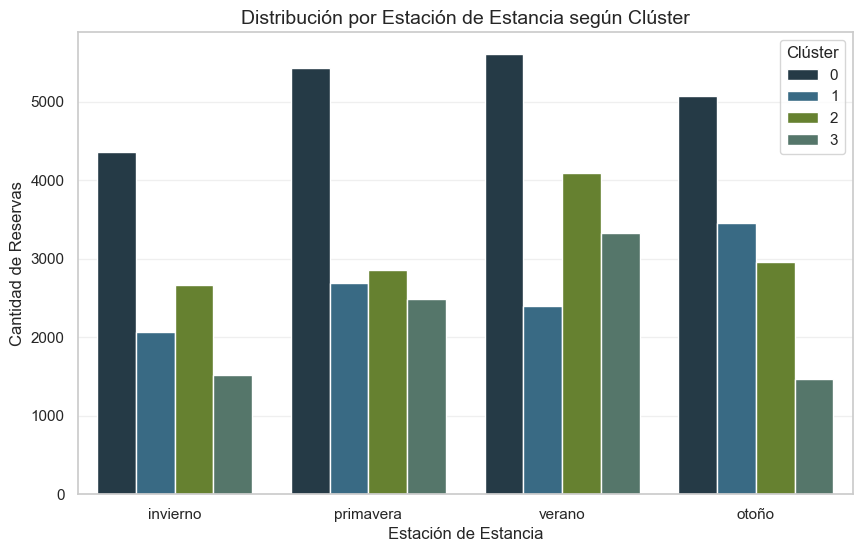

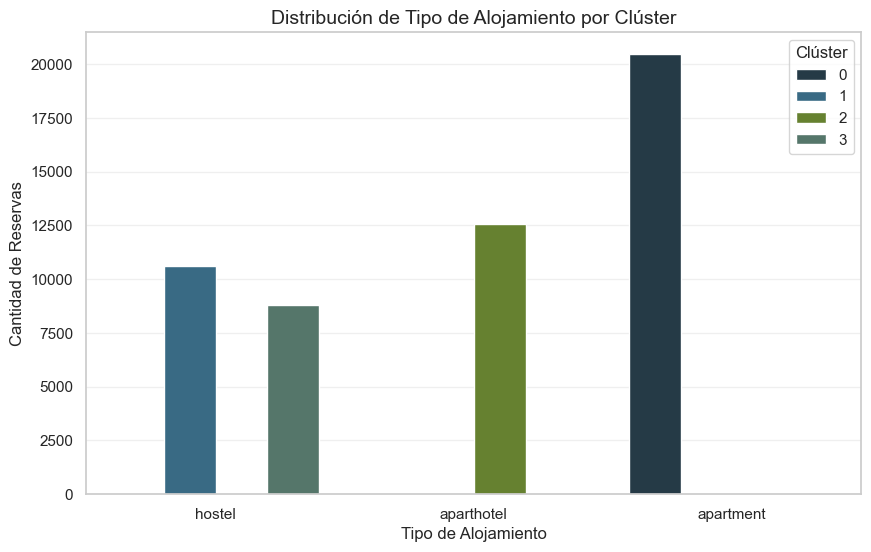

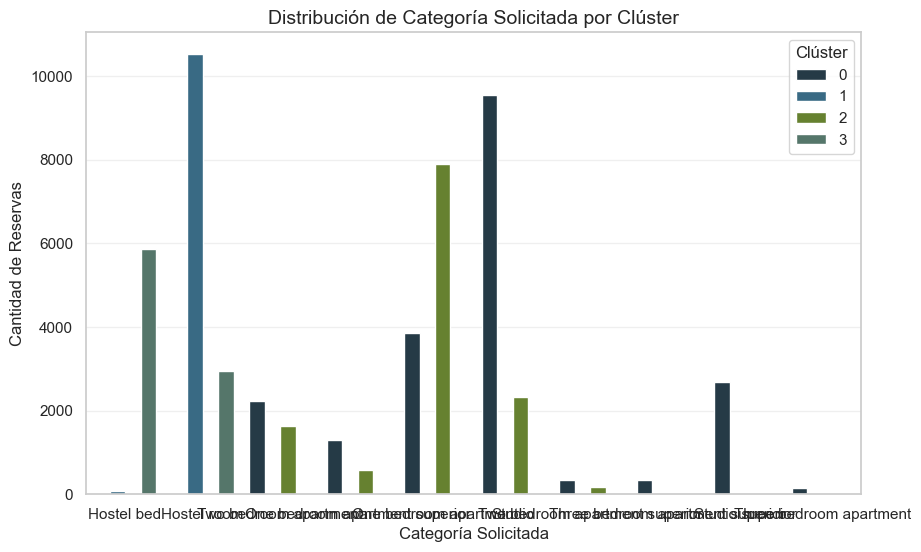

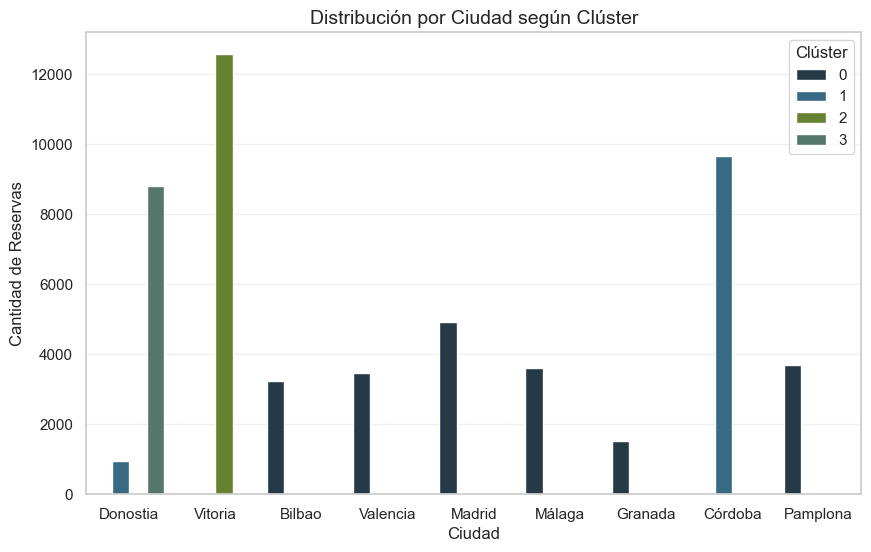

C:\Users\maita\AppData\Local\Temp\ipykernel_73904\1404842989.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='clusters', y='adult_count', palette=palette_hospitality[:4], ax=axes[0])
C:\Users\maita\AppData\Local\Temp\ipykernel_73904\1404842989.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='clusters', y='child_count', palette=palette_hospitality[:4], ax=axes[1])
C:\Users\maita\AppData\Local\Temp\ipykernel_73904\1404842989.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='clusters', y='lenght_of

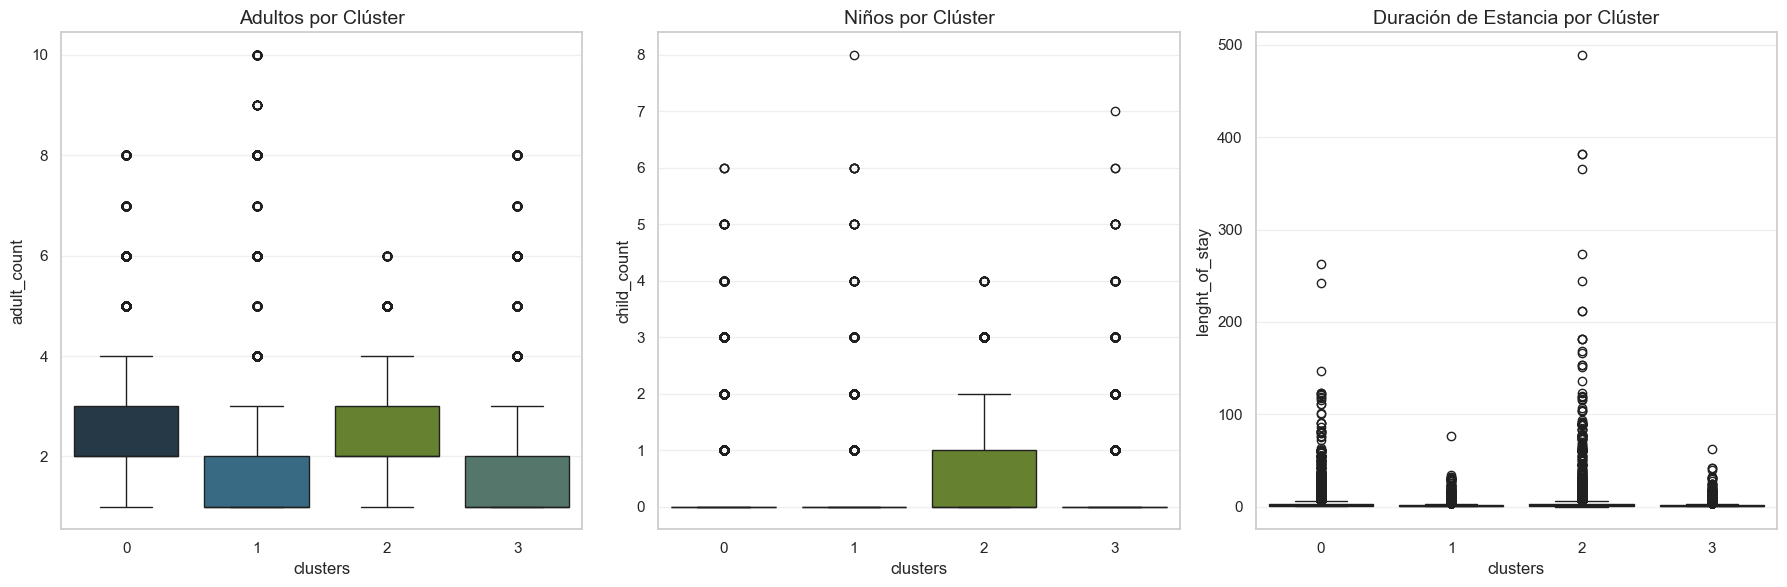

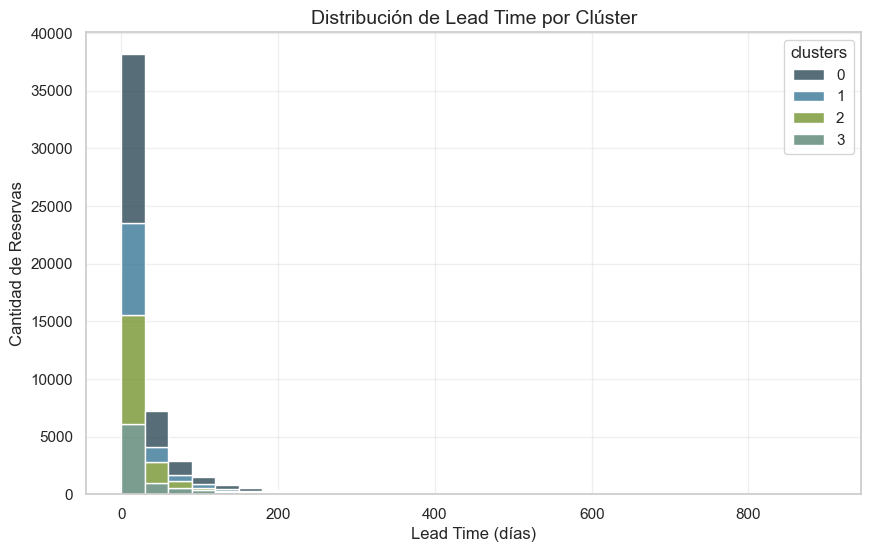

C:\Users\maita\AppData\Local\Temp\ipykernel_73904\1404842989.py:61: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\maita\AppData\Local\Temp\ipykernel_73904\1404842989.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\maita\AppData\Local\Temp\ipykernel_73904\1404842989.py:61: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\maita\AppData\Local\Temp\ipykernel_73904\1404842989.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\maita\AppData\Local\Temp\ipykernel_73904\1404842989.py:61: FutureWarning: 

The `ci` parameter is deprecate

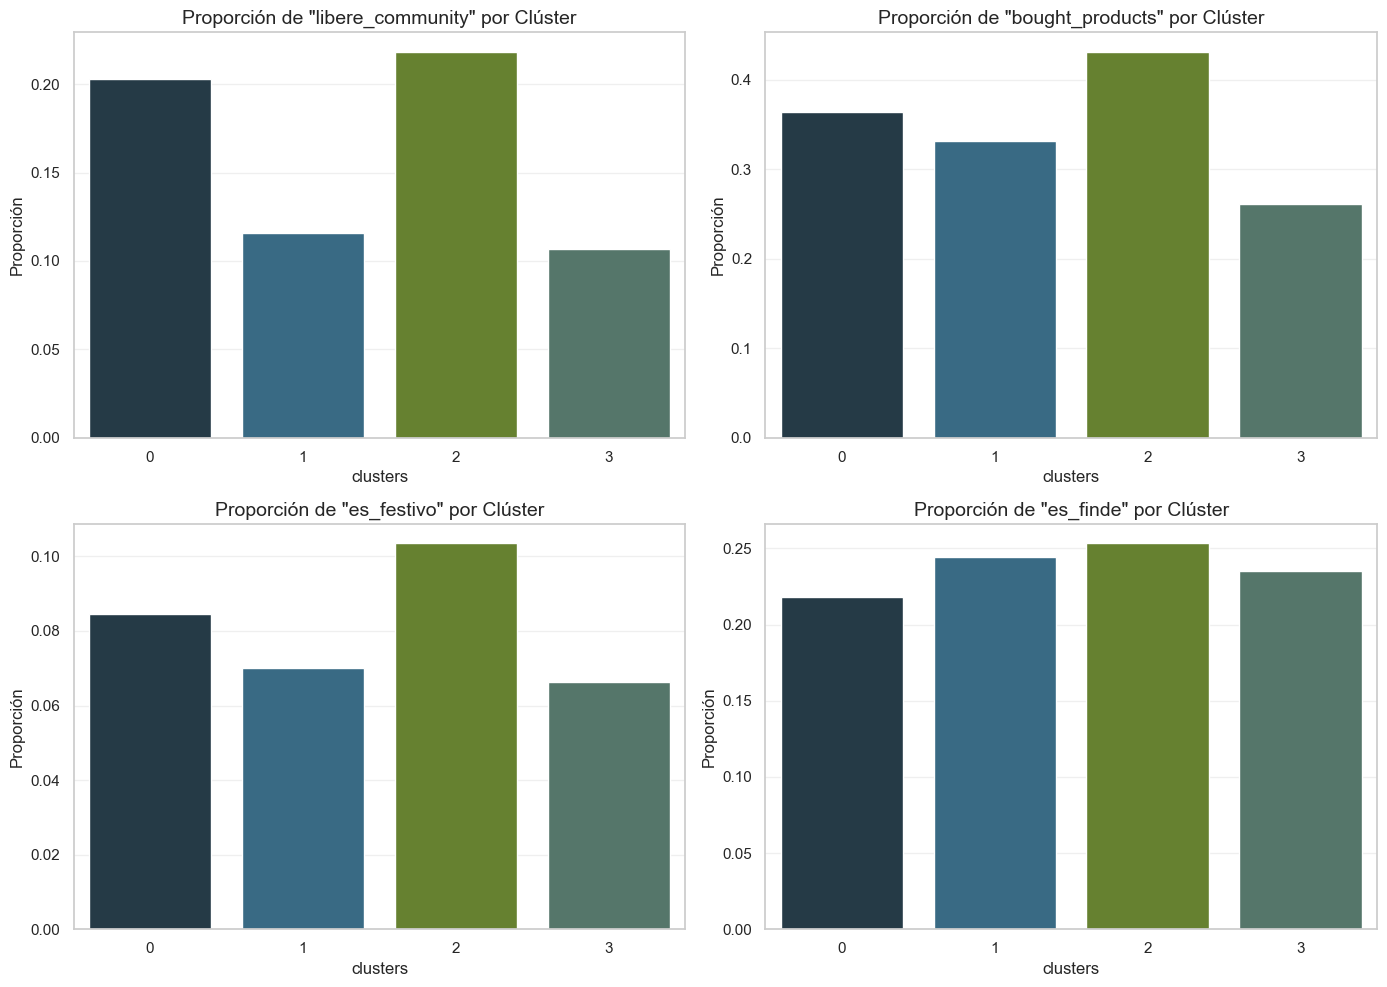

In [18]:
# 1. Estacionalidad por clúster
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='estacion_estancia', hue='clusters', palette=palette_hospitality[:4])
plt.title('Distribución por Estación de Estancia según Clúster')
plt.xlabel('Estación de Estancia')
plt.ylabel('Cantidad de Reservas')
plt.legend(title='Clúster')
plt.show()

# 2. Tipo de habitación por clúster
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='asset_type', hue='clusters', palette=palette_hospitality[:4])
plt.title('Distribución de Tipo de Alojamiento por Clúster')
plt.xlabel('Tipo de Alojamiento')
plt.ylabel('Cantidad de Reservas')
plt.legend(title='Clúster')
plt.show()

# Categoría solicitada por clúster
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='requested_category', hue='clusters', palette=palette_hospitality[:4])
plt.title('Distribución de Categoría Solicitada por Clúster')
plt.xlabel('Categoría Solicitada')
plt.ylabel('Cantidad de Reservas')
plt.legend(title='Clúster')
plt.show()

# 3. Ciudad por clúster
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='city', hue='clusters', palette=palette_hospitality[:4])
plt.title('Distribución por Ciudad según Clúster')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Reservas')
plt.legend(title='Clúster')
plt.show()

# 4. Adultos, Niños y Duración de estancia (boxplots)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(data=df, x='clusters', y='adult_count', palette=palette_hospitality[:4], ax=axes[0])
axes[0].set_title('Adultos por Clúster')
sns.boxplot(data=df, x='clusters', y='child_count', palette=palette_hospitality[:4], ax=axes[1])
axes[1].set_title('Niños por Clúster')
sns.boxplot(data=df, x='clusters', y='lenght_of_stay', palette=palette_hospitality[:4], ax=axes[2])
axes[2].set_title('Duración de Estancia por Clúster')
plt.tight_layout()
plt.show()

# 5. Lead time por clúster (histograma)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='lead_time', hue='clusters', multiple='stack', palette=palette_hospitality[:4], bins=30)
plt.title('Distribución de Lead Time por Clúster')
plt.xlabel('Lead Time (días)')
plt.ylabel('Cantidad de Reservas')
plt.show()

# 6. Variables booleanas
bool_vars = ['libere_community', 'bought_products', 'es_festivo', 'es_finde']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for i, var in enumerate(bool_vars):
    ax = axes[i // 2, i % 2]
    sns.barplot(
        x='clusters',
        y=var,
        data=df,
        estimator=lambda x: sum(x) / len(x),
        ci=None,
        palette=palette_hospitality[:4],
        ax=ax
    )
    ax.set_title(f'Proporción de "{var}" por Clúster')
    ax.set_ylabel('Proporción')
plt.tight_layout()
plt.show()



Gráfico clústeres: Valor económico vs tasa real de cancelación

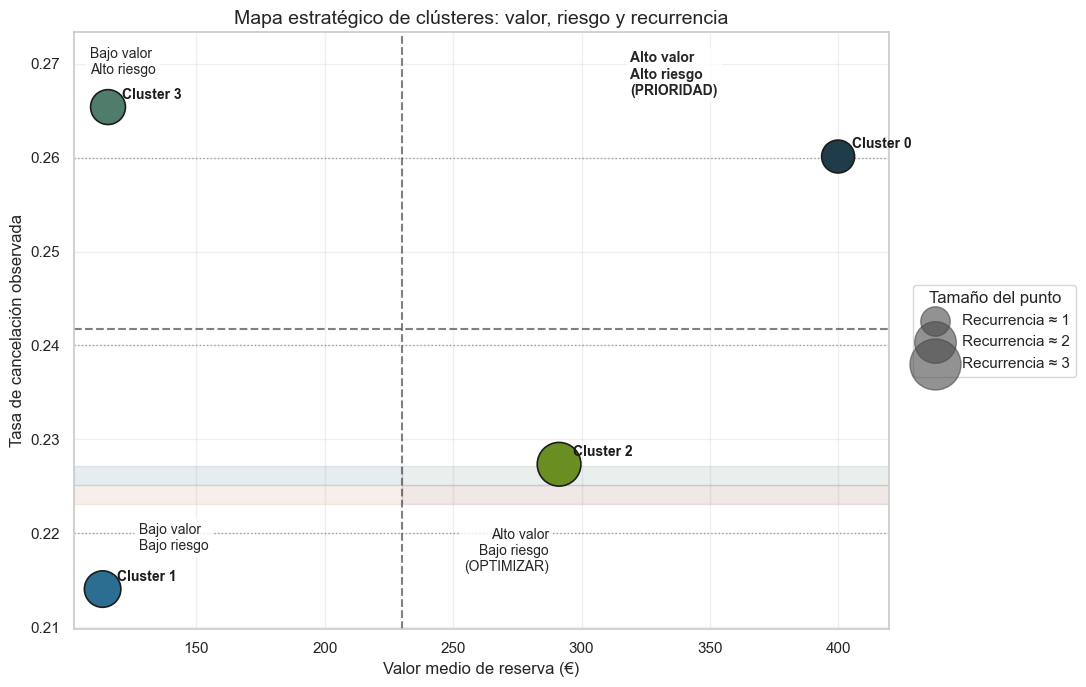

In [ ]:

palette_hospitality = [
    "#1F3C4B", "#2C6E91", "#6B8E23", "#4F7C6B",
    "#E6D5B8", "#D8CFC4", "#C97C5D", "#C9A24D",
    "#4A4A4A", "#9E9E9E", "#F7F4EF", "#1C1C1C",
    "#8B3A3A",
    "#6F8F72"
]

sns.set_theme(
    style="whitegrid",
    palette=palette_hospitality,
    rc={
        "figure.figsize": (11, 7),
        "axes.titlesize": 14,
        "axes.labelsize": 12,
        "grid.alpha": 0.3,
        "font.size": 11
    }
)


cluster_summary = (
    df.groupby("clusters")
      .agg(
          valor_medio=("reservation_net_value", "mean"),
          tasa_cancelacion=("ha_cancelado", "mean"),
          recurrencia_media=("recurrence", "mean")
      )
      .reset_index()
)

# Medias
x_mean = cluster_summary["valor_medio"].mean()
y_mean = cluster_summary["tasa_cancelacion"].mean()

# Límites
x_min = cluster_summary["valor_medio"].min() * 0.9
x_max = cluster_summary["valor_medio"].max() * 1.05
y_min = cluster_summary["tasa_cancelacion"].min() * 0.98
y_max = cluster_summary["tasa_cancelacion"].max() * 1.03


clusters = sorted(cluster_summary["clusters"].unique())
cluster_colors = {
    c: palette_hospitality[i % len(palette_hospitality)]
    for i, c in enumerate(clusters)
}

colors = [cluster_colors[c] for c in cluster_summary["clusters"]]


fig, ax = plt.subplots()

# Zonas
ax.axvspan(x_min, x_mean, y_mean, y_max, color=palette_hospitality[1], alpha=0.12)
ax.axvspan(x_mean, x_max, y_mean, y_max, color=palette_hospitality[3], alpha=0.12)
ax.axvspan(x_min, x_mean, y_min, y_mean, color=palette_hospitality[6], alpha=0.12)
ax.axvspan(x_mean, x_max, y_min, y_mean, color=palette_hospitality[12], alpha=0.12)

# Iso-riesgo
for y in [0.22, 0.24, 0.26]:
    ax.hlines(y, x_min, x_max,
              linestyle=":", linewidth=1,
              color=palette_hospitality[8], alpha=0.5)


ax.scatter(
    cluster_summary["valor_medio"],
    cluster_summary["tasa_cancelacion"],
    s=cluster_summary["recurrencia_media"] * 450,
    c=colors,
    edgecolor=palette_hospitality[11],
    linewidth=1.2,
    zorder=3
)

for _, row in cluster_summary.iterrows():
    ax.annotate(
        f"Cluster {int(row['clusters'])}",
        (row["valor_medio"], row["tasa_cancelacion"]),
        xytext=(10, 6),
        textcoords="offset points",
        fontsize=10,
        weight="bold",
        color=palette_hospitality[11]
    )

# Líneas medias
ax.axvline(x_mean, linestyle="--", color=palette_hospitality[8], alpha=0.7)
ax.axhline(y_mean, linestyle="--", color=palette_hospitality[8], alpha=0.7)

pad_x = (x_max - x_min) * 0.05
pad_y = (y_max - y_min) * 0.08

text_kw = dict(
    fontsize=10,
    bbox=dict(
        boxstyle="round,pad=0.3",
        facecolor="white",
        alpha=0.8,
        edgecolor="none"
    )
)

# Bajo valor / Alto riesgo
ax.text(
    x_min + pad_x * 0.4,
    y_max - pad_y * 0.3,
    "Bajo valor\nAlto riesgo",
    ha="left", va="top", **text_kw
)

# Alto valor / Alto riesgo 
ax.text(
    x_mean + pad_x * 5.6,
    y_max - pad_y * 0.4,
    "Alto valor\nAlto riesgo\n(PRIORIDAD)",
    ha="left", va="top", weight="bold", **text_kw
)

# Bajo valor / Bajo riesgo
ax.text(
    x_min + pad_x * 1.6,
    y_min + pad_y * 1.6,
    "Bajo valor\nBajo riesgo",
    ha="left", va="bottom", **text_kw
)

# Alto valor / Bajo riesgo
ax.text(
    x_mean + pad_x * 3.6,
    y_min + pad_y * 1.15,
    "Alto valor\nBajo riesgo\n(OPTIMIZAR)",
    ha="right", va="bottom", **text_kw
)

for r in [1, 2, 3]:
    ax.scatter([], [], s=r * 450,
               color=palette_hospitality[8], alpha=0.6,
               label=f"Recurrencia ≈ {r}")

ax.legend(
    title="Tamaño del punto",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    frameon=True
)

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xlabel("Valor medio de reserva (€)")
ax.set_ylabel("Tasa de cancelación observada")
ax.set_title("Mapa estratégico de clústeres: valor, riesgo y recurrencia")

plt.tight_layout()
plt.show()



Lead time como riesgo acumulativo real

C:\Users\maita\AppData\Local\Temp\ipykernel_73904\1804112014.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lead_risk = df.groupby("lead_time_bin")["ha_cancelado"].mean()


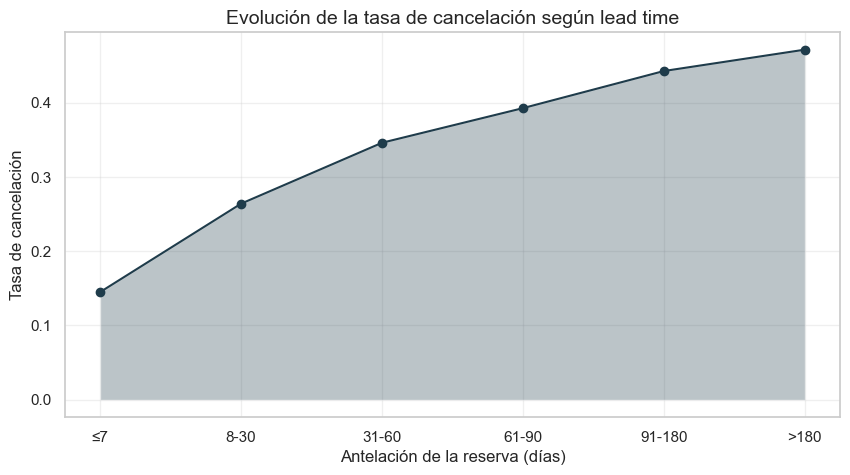

In [ ]:
df["lead_time_bin"] = pd.cut(
    df["lead_time"],
    bins=[0, 7, 30, 60, 90, 180, 365],
    labels=["≤7", "8-30", "31-60", "61-90", "91-180", ">180"]
)

lead_risk = df.groupby("lead_time_bin")["ha_cancelado"].mean()

plt.figure(figsize=(10, 5))
plt.plot(lead_risk.index, lead_risk.values, marker="o")
plt.fill_between(range(len(lead_risk)), lead_risk.values, alpha=0.3)

plt.ylabel("Tasa de cancelación")
plt.xlabel("Antelación de la reserva (días)")
plt.title("Evolución de la tasa de cancelación según lead time")
plt.show()


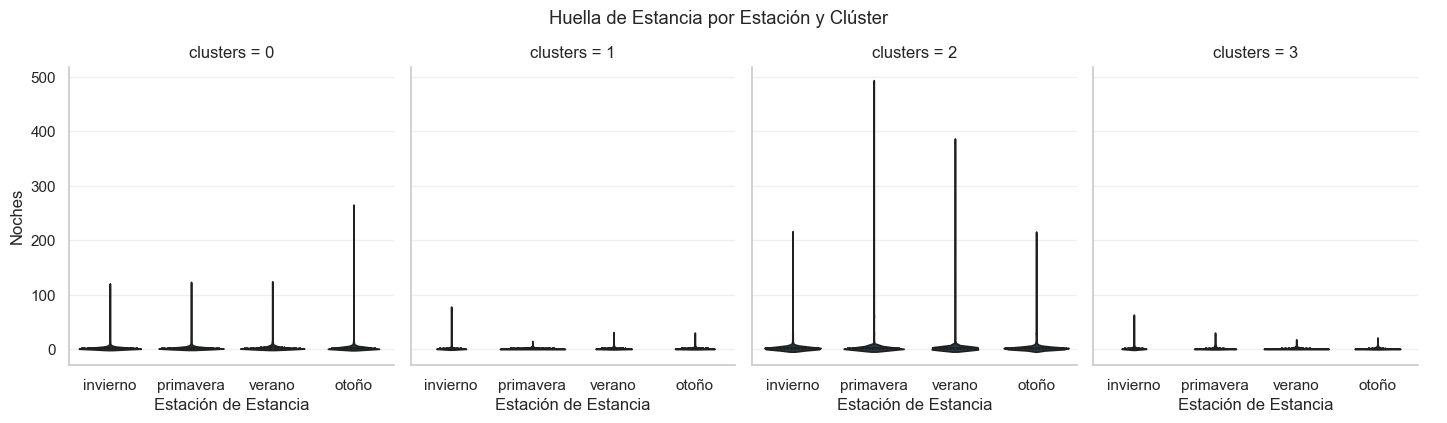

In [ ]:
g = sns.catplot(
    data=df,
    x="estacion_estancia",
    y="lenght_of_stay",
    col="clusters",
    kind="violin",
    inner="quartile",
    height=4,
    aspect=0.9
)

g.fig.suptitle("Huella de Estancia por Estación y Clúster", y=1.05)
g.set_axis_labels("Estación de Estancia", "Noches")

plt.show()





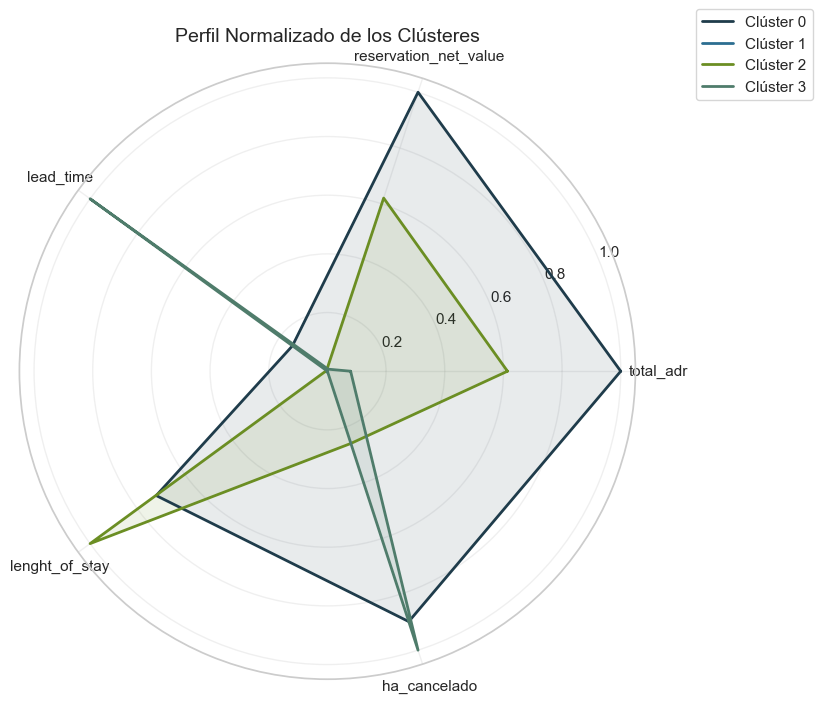

In [ ]:
cluster_profile = df.groupby("clusters").agg({
    "total_adr": "mean",
    "reservation_net_value": "mean",
    "lead_time": "mean",
    "lenght_of_stay": "mean",
    "ha_cancelado": "mean"
})

cluster_profile = (cluster_profile - cluster_profile.min()) / (
    cluster_profile.max() - cluster_profile.min()
)

labels = cluster_profile.columns
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
angles = np.concatenate([angles, [angles[0]]])

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)

for idx, row in cluster_profile.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=f"Clúster {idx}")
    ax.fill(angles, values, alpha=0.1)

ax.set_thetagrids(angles[:-1]*180/np.pi, labels)
plt.title("Perfil Normalizado de los Clústeres")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))

plt.show()


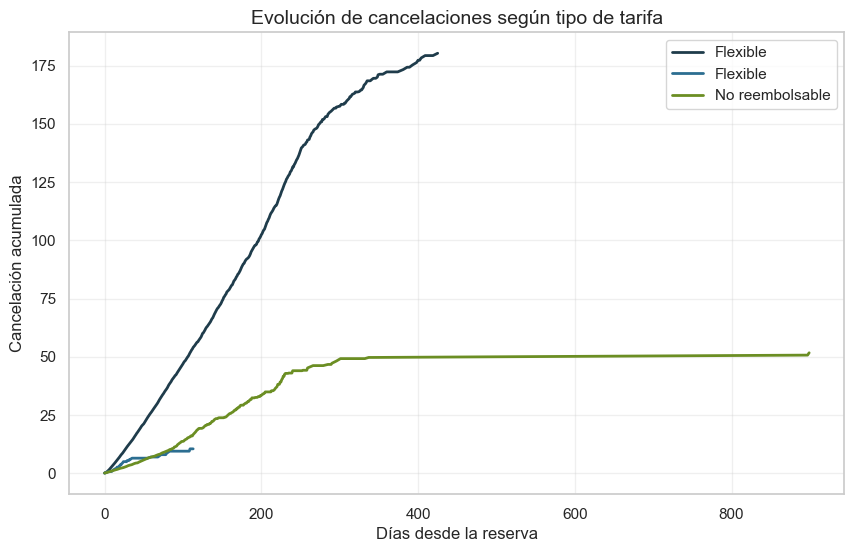

In [ ]:
df_sorted = df.sort_values('lead_time')
df_sorted_non_ref = df[df['rate_type']== 'Non Refundable']


cumulative = (
    df_sorted.groupby(['lead_time', 'rate_type'])['ha_cancelado']
    .mean()
    .groupby(level=1)
    .cumsum()
    .reset_index()
)
cumulative

for tariff in cumulative['rate_type'].unique():
    subset = cumulative[cumulative['rate_type'] == tariff]
    plt.plot(
        subset['lead_time'],
        subset['ha_cancelado'],
        label='No reembolsable' if tariff == 'Non Refundable' else 'Flexible'
    )

plt.xlabel('Días desde la reserva')
plt.ylabel('Cancelación acumulada')
plt.title('Evolución de cancelaciones según tipo de tarifa')
plt.legend()
plt.show()


